In [65]:
import torch
import torchvision
import imageio
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [12]:
fp ='created_datasets/ADOBE240/720p_240fps_1__100_0.jpeg'
# fp = 'created_datasets/UCF101/v_ApplyEyeMakeup_g01_c01__0_1.jpeg'

In [37]:
img = Image.open(fp)

In [20]:
height, width = img.shape[:2]

In [28]:
H = (height/2)+40
W = (width/2)+40

In [30]:
H, W

(400.0, 680.0)

In [115]:
class Cropper:
    
    
    def __init__(self, height, width):
        self.height = height
        self.width = width
        self.H = int((height/2)+40)
        self.W = int((width/2)+40)
        
    def crop(self, img):
        
        if isinstance(img, np.ndarray):
            img = Image.fromarray(np.uint8(img))
        
        TL = torchvision.transforms.functional.crop(img, i=0, j=0, h=self.H, w=self.W)
        TR = torchvision.transforms.functional.crop(img, i=0, j=self.width-self.W, h=self.H, w=self.W)
        BL = torchvision.transforms.functional.crop(img, i=self.height-self.H, j=0, h=self.H, w=self.W)
        BR = torchvision.transforms.functional.crop(img, i=self.height-self.H, j=self.width-self.W, h=self.H, w=self.W)
        
        return TL, TR, BL, BR
    
    def decrop(self, TL, TR, BL, BR):
        R = np.zeros((self.height,self.1080, 3))
        print(self.H, self.W, np.array(TL).shape)
        R[:self.H, :self.W, :] = TL
        R[:self.H, (self.width-self.W):, :] = TR
        R[(self.height-self.H):, :self.W, :] = BL
        R[(self.height-self.H):, (self.width-self.W):, :] = BR
        
        return R
        

In [116]:
C = Cropper(720, 1080)

In [117]:
results = C.crop(img)

In [118]:
R = np.zeros((3,720,1080))


In [139]:
isinstance(np.array(img), np.ndarray)

True

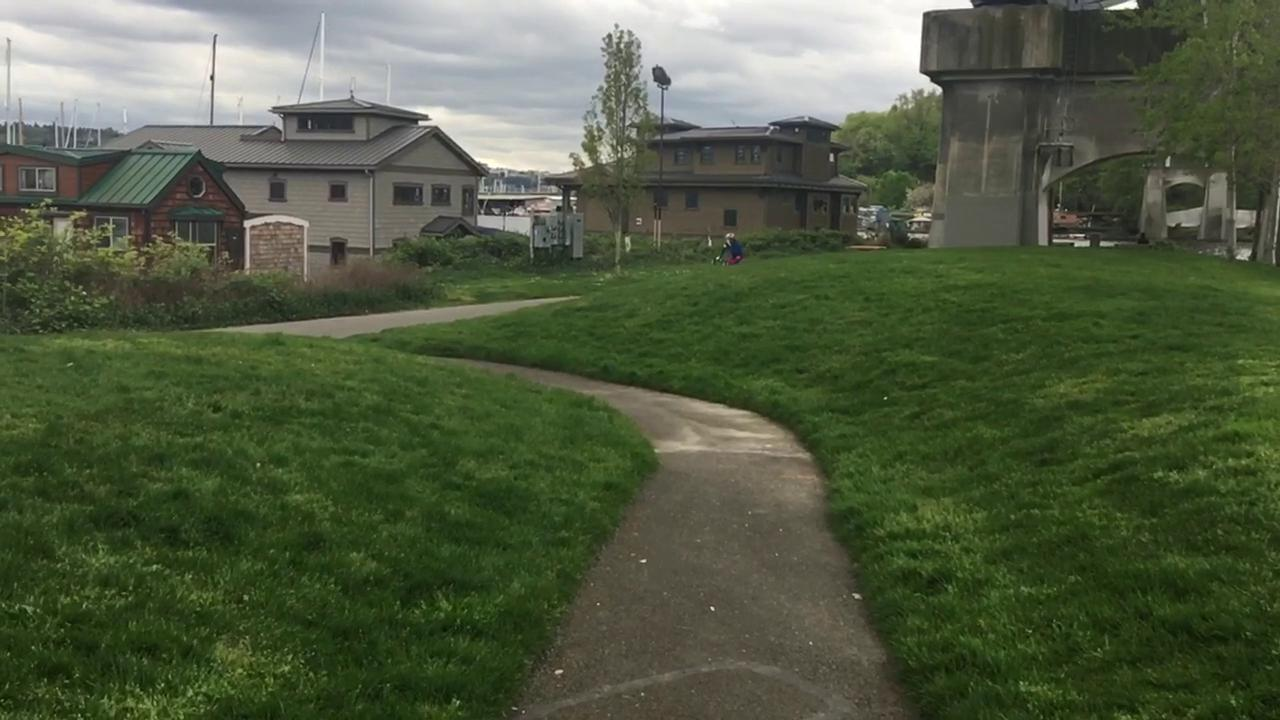

In [136]:
Image.fromarray(np.uint8(img))

In [119]:
R[:, :400, :580] = results[0]

ValueError: could not broadcast input array from shape (400,580,3) into shape (3,400,580)

In [120]:
backimg = C.decrop(*results)

400 580 (400, 580, 3)


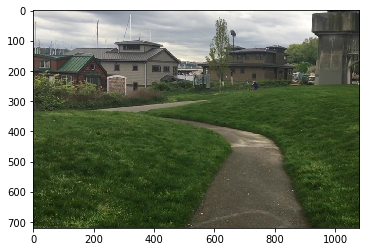

In [130]:
plt.imshow(backimg.astype(int))

In [40]:


# #TL
# TL = torchvision.transforms.functional.crop(img, i=0, j=0, h=H, w=W)

# #TR
# TR = torchvision.transforms.functional.crop(img, i=0, j=width-W, h=H, w=W)

# #BL
# BL = torchvision.transforms.functional.crop(img, i=height-H, j=0, h=H, w=W)

# #BR
# BR = torchvision.transforms.functional.crop(img, i=height-H, j=width-W, h=H, w=W)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])